# A foodie's guide to Osaka


## 1.Introduction (Week 1)

##2.Data section (Week 1)

### Initial data collection and preparation

Import libraries

In [232]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
import json
import random
from geopy.geocoders import Nominatim
import requests
from bs4 import BeautifulSoup 
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
from folium import plugins
import os
from IPython.display import Image 
from IPython.core.display import HTML

print('Libraries imported.')

Libraries imported.


Scraping postal codes of Osaka

In [36]:
japan = requests.get('https://en.wikipedia.org/wiki/Wards_of_Japan').text
soup = BeautifulSoup(japan,'lxml')
japan_table = soup.find('table', {'class':'wikitable sortable'})
column_names = ['Wards','Kanji','City','Area']
df = pd.DataFrame(columns=column_names)
df.head()

,Wards,Kanji,City,Area


In [37]:
for tr_cell in japan_table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)==4:
        df.loc[len(df)] = row_data
df=df[df['City'].isin(['Osaka'])]
print(df.shape)
df.head()

(24, 4)


,Wards,Kanji,City,Area
95,Abeno,阿倍野区,Osaka,5.98
96,Asahi,旭区,Osaka,6.32
97,Chūō,中央区,Osaka,8.87
98,Fukushima,福島区,Osaka,4.67
99,Higashinari,東成区,Osaka,4.54


Get the geographical coordinates of Wards in Osaka.

In [71]:
df["new"] = df['Wards'] + '-ku, Osaka' #Creat a new column with '-ku, Osaka' added to the ward names to increase the accuracy for coordinates results.
geolocator = Nominatim(user_agent="Osaka_explorer")
df['Major_Dist_Coord']= df['new'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord','new'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.shape)
df.head(24)

(24, 6)


,Wards,Kanji,City,Area,Latitude,Longitude
0,Abeno,阿倍野区,Osaka,5.98,34.627501,135.514095
1,Asahi,旭区,Osaka,6.32,34.726483,135.546952
2,Chūō,中央区,Osaka,8.87,34.679846,135.510316
3,Fukushima,福島区,Osaka,4.67,34.692104,135.474812
4,Higashinari,東成区,Osaka,4.54,34.672912,135.550567
5,Higashisumiyoshi,東住吉区,Osaka,9.75,34.615662,135.531096
6,Higashiyodogawa,東淀川区,Osaka,13.27,34.740212,135.517432
7,Hirano,平野区,Osaka,15.28,34.603715,135.559027
8,Ikuno,生野区,Osaka,8.37,34.653003,135.547722
9,Joto,城東区,Osaka,8.38,34.693887,135.547769


In [0]:
# save the DataFrame as CSV file
df.to_csv("osaka_df.csv", index=False)

In [73]:
osaka_df = pd.read_csv("osaka_df.csv")
osaka_df.drop(columns=["City"],inplace=True)
osaka_df.head()

,Wards,Kanji,Area,Latitude,Longitude
0,Abeno,阿倍野区,5.98,34.627501,135.514095
1,Asahi,旭区,6.32,34.726483,135.546952
2,Chūō,中央区,8.87,34.679846,135.510316
3,Fukushima,福島区,4.67,34.692104,135.474812
4,Higashinari,東成区,4.54,34.672912,135.550567


Create a map of Osaka with wards superimposed on top

In [0]:
address = 'Chūōku, Osaka'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
lat_chuoku = location.latitude
lon_chuoku = location.longitude

In [238]:
map_osaka = folium.Map(location=[lat_chuoku, lon_chuoku], zoom_start=12) #using the coordinates of Chūōku to create the map, providing the best view of Osaka

mark_ward = folium.map.FeatureGroup()
for lat, lng, label in zip(osaka_df['Latitude'],osaka_df['Longitude'],osaka_df['Wards']):
    mark_ward.add_child(
    folium.CircleMarker(
        [lat, lng],
        radius=15,
        popup=label,
        color='white',
        fill_color='#3183cc',
        fill_opacity=0.3
        )
    )


map_osaka.add_child(mark_ward)

[Osaka](Osaka.jpg)

Define Foursquare Credentials and Version

In [0]:
CLIENT_ID = 'LCB1PXFFN0RYEONQAASUFW1RS0VWXQJEQM5JJCKT15VMJVPC'
CLIENT_SECRET = 'OLNEHS3UZSZJVM43F4FBH3BLA4T0VDLPFNY1RAY5TDUD4ZKV'
VERSION = '20200504'
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius

Create a function to get the nearby venues for all wards in Osaka

In [0]:
def getNearbyVenues(names, latitudes, longitudes):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward', 
                  'Ward_Latitude', 
                  'Ward_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [144]:
Osaka_venues = getNearbyVenues(names=osaka_df['Wards'],
                               latitudes=osaka_df['Latitude'],
                               longitudes=osaka_df['Longitude']
                               )

Abeno
Asahi
Chūō
Fukushima
Higashinari
Higashisumiyoshi
Higashiyodogawa
Hirano
Ikuno
Joto
Kita
Konohana
Minato
Miyakojima
Naniwa
Nishi
Nishinari
Nishiyodogawa
Suminoe
Sumiyoshi
Taishō
Tennōji
Tsurumi
Yodogawa


In [145]:
print(Osaka_venues.shape)
Osaka_venues.head()

(2248, 7)


,Ward,Ward_Latitude,Ward_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Abeno,34.627501,135.514095,Usagi to Boku (うさぎとぼく),34.629734,135.515104,Coffee Shop
1,Abeno,34.627501,135.514095,桃ヶ池公園,34.631239,135.521659,Park
2,Abeno,34.627501,135.514095,スタンドアサヒ,34.625118,135.520530,Sake Bar
3,Abeno,34.627501,135.514095,Gogh (石窯パンの店 ゴッホ),34.621037,135.522307,Bakery
4,Abeno,34.627501,135.514095,ライフ セントラルスクエア 北畠店,34.626273,135.509131,Supermarket


In [0]:
Osaka_restaurant.to_csv("Osaka_restaurant.csv")
from google.colab import files
files.download("Osaka_restaurant.csv")

Create a data frame with **Restaurant**.

In [147]:
Osaka_restaurant = Osaka_venues[Osaka_venues['Venue_Category'].str.contains('Restaurant')].reset_index(drop=True)
Osaka_restaurant.index = np.arange(1, len(Osaka_restaurant)+1)
Osaka_restaurant.reset_index(drop=True, inplace=True)
print(Osaka_restaurant.shape)
Osaka_restaurant.head()

(656, 7)


,Ward,Ward_Latitude,Ward_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Abeno,34.627501,135.514095,ハンバーグレストラン BOSTON 昭和町本店,34.632831,135.516725,American Restaurant
1,Abeno,34.627501,135.514095,Genji,34.623867,135.494649,Restaurant
2,Abeno,34.627501,135.514095,Men to Kokoro 7 (麺と心 7),34.639715,135.511143,Ramen Restaurant
3,Abeno,34.627501,135.514095,Royal Host (ロイヤルホスト 文の里店),34.637175,135.517652,Restaurant
4,Abeno,34.627501,135.514095,甘辛や,34.638189,135.522473,Okonomiyaki Restaurant


Investigate the restaurant categories.

In [148]:
print('There are {} unique categories.'.format(len(Osaka_restaurant['Venue_Category'].unique())))
print (Osaka_restaurant['Venue_Category'].value_counts())

There are 43 unique categories.
Ramen Restaurant                 115
Japanese Restaurant               63
Chinese Restaurant                61
Japanese Curry Restaurant         46
Sushi Restaurant                  42
Udon Restaurant                   38
Fast Food Restaurant              35
Restaurant                        28
Italian Restaurant                24
Donburi Restaurant                23
Okonomiyaki Restaurant            21
Kushikatsu Restaurant             16
Yoshoku Restaurant                13
Indian Restaurant                 12
American Restaurant               11
Soba Restaurant                   10
Asian Restaurant                   8
Tempura Restaurant                 7
Sri Lankan Restaurant              7
Dim Sum Restaurant                 7
Seafood Restaurant                 7
Dumpling Restaurant                6
Nabe Restaurant                    6
Tonkatsu Restaurant                5
Yakitori Restaurant                5
Korean Restaurant                  4
Unagi 

In [218]:
print (Osaka_restaurant['Ward'].value_counts())

Yodogawa            44
Fukushima           41
Miyakojima          39
Chūō                38
Higashiyodogawa     38
Nishi               36
Kita                35
Higashinari         33
Nishinari           31
Naniwa              31
Tennōji             31
Joto                30
Ikuno               27
Tsurumi             24
Asahi               23
Hirano              23
Abeno               22
Higashisumiyoshi    20
Minato              19
Sumiyoshi           19
Nishiyodogawa       16
Suminoe             15
Taishō              12
Konohana             9
Name: Ward, dtype: int64


Analyze the restaurant categories in Osaka

In [222]:
# one hot encoding
osaka_onehot = pd.get_dummies(Osaka_restaurant[['Venue_Category']], prefix="", prefix_sep="")
osaka_onehot['Ward'] = Osaka_restaurant['Ward'] 
ward = osaka_onehot['Ward']
osaka_onehot.drop(labels=['Ward'], axis=1,inplace = True)
osaka_onehot.insert(0, 'Ward', ward)
venue_counts = osaka_onehot.groupby('Ward').sum()
venue_counts.head()

,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Donburi Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,Halal Restaurant,Hawaiian Restaurant,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Kaiseki Restaurant,Korean Restaurant,Kushikatsu Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Nabe Restaurant,Okonomiyaki Restaurant,Ramen Restaurant,Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Soba Restaurant,South Indian Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Tapas Restaurant,Tempura Restaurant,Thai Restaurant,Theme Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
Ward,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abeno,1,1,0,1,0,1,1,2,0,0,0,1,1,1,3,0,0,0,0,0,0,0,1,3,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
Asahi,0,0,0,7,0,1,0,1,0,0,0,0,1,3,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,0,0,0
Chūō,2,1,0,1,0,0,0,0,0,1,0,1,2,11,2,0,0,0,0,1,1,0,1,6,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,2
Fukushima,0,1,0,3,0,0,0,0,0,0,0,1,2,4,4,0,1,0,1,0,0,1,1,12,1,1,0,1,0,1,1,1,0,1,0,0,0,2,0,0,0,1,0
Higashinari,1,0,0,4,0,1,0,2,0,0,0,0,1,2,3,0,0,0,0,0,0,0,1,9,1,1,0,0,0,0,0,3,0,0,0,0,0,3,0,0,0,0,1


In [231]:
venue_counts_described = venue_counts.describe().transpose()
venue_top8 = venue_counts_described.sort_values('max', ascending=False)[0:8]
venue_top8

,count,mean,std,min,25%,50%,75%,max
Ramen Restaurant,24.0,4.791667,3.463840,0.0,2.75,4.0,5.25,15.0
Japanese Curry Restaurant,24.0,1.916667,2.320357,0.0,0.00,2.0,2.25,11.0
Chinese Restaurant,24.0,2.541667,1.793204,0.0,1.00,2.0,4.00,7.0
Japanese Restaurant,24.0,2.625000,1.739878,0.0,1.00,2.0,4.00,7.0
Okonomiyaki Restaurant,24.0,0.875000,1.392917,0.0,0.00,0.0,1.00,6.0
Kushikatsu Restaurant,24.0,0.666667,1.522774,0.0,0.00,0.0,0.25,6.0
Udon Restaurant,24.0,1.583333,1.212854,0.0,1.00,1.0,3.00,4.0
Sushi Restaurant,24.0,1.750000,1.188715,0.0,1.00,2.0,2.25,4.0


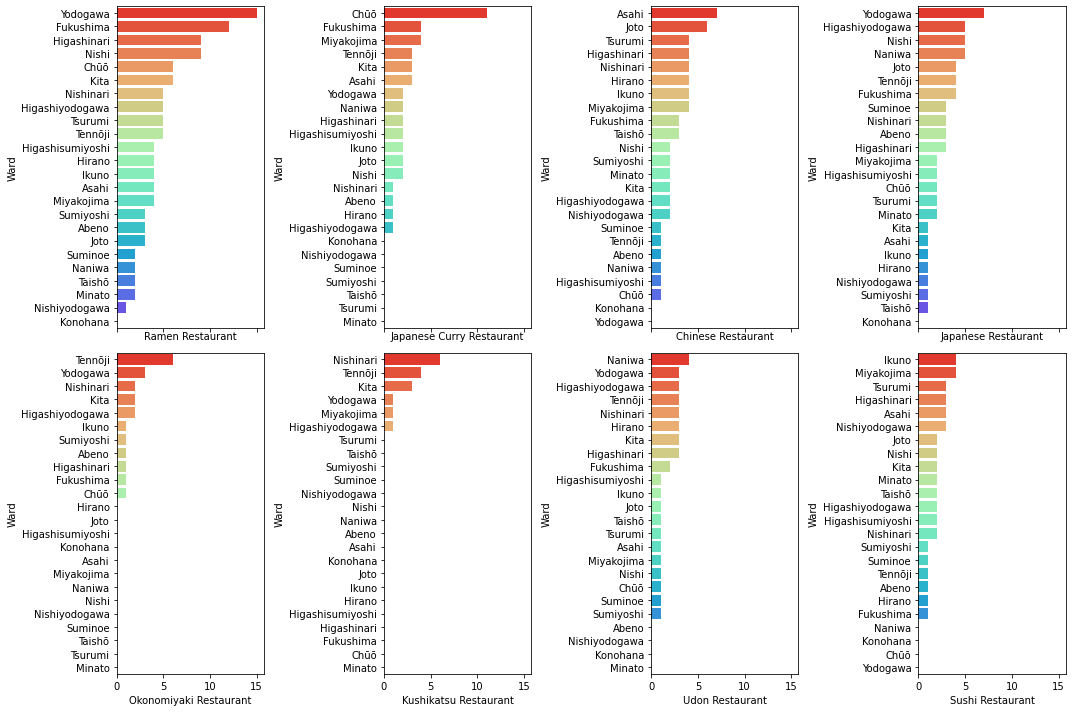

In [229]:
venue_top8_list = venue_top8.index.values.tolist()

fig, axes =plt.subplots(2, 4, figsize=(15,10), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top8_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:24]
    pal = sns.color_palette("rainbow", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show()